## Get data

In [ ]:
mnist_url = "https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz"

In [ ]:
from pathlib import Path

In [ ]:
data_dir = Path("data")
data_dir.mkdir(exist_ok=True)

In [ ]:
import urllib

In [ ]:
mnist_filepath = data_dir / "mnist.pkl.gz"

In [ ]:
if not mnist_filepath.exists():
    urllib.request.urlretrieve(mnist_url, mnist_filepath)

In [ ]:
import gzip
import pickle

In [ ]:
gzip.open?

Signature:
gzip.open(
    filename,
    mode='rb',
    compresslevel=9,
    encoding=None,
    errors=None,
    newline=None,
)
Docstring:
Open a gzip-compressed file in binary or text mode.

The filename argument can be an actual filename (a str or bytes object), or
an existing file object to read from or write to.

The mode argument can be "r", "rb", "w", "wb", "x", "xb", "a" or "ab" for
binary mode, or "rt", "wt", "xt" or "at" for text mode. The default mode is
"rb", and the default compresslevel is 9.

For binary mode, this function is equivalent to the GzipFile constructor:
GzipFile(filename, mode, compresslevel). In this case, the encoding, errors
and newline arguments must not be provided.

For text mode, a GzipFile object is created, and wrapped in an
io.TextIOWrapper instance with the specified encoding, error handling
behavior, and line ending(s).
File:      ~/miniforge3/envs/fastai/lib/python3.11/gzip.py
Type:      function

In [ ]:
pickle.load?

Signature:
pickle.load(
    file,
    *,
    fix_imports=True,
    encoding='ASCII',
    errors='strict',
    buffers=(),
)
Docstring:
Read and return an object from the pickle data stored in a file.

This is equivalent to ``Unpickler(file).load()``, but may be more
efficient.

The protocol version of the pickle is detected automatically, so no
protocol argument is needed.  Bytes past the pickled object's
representation are ignored.

The argument *file* must have two methods, a read() method that takes
an integer argument, and a readline() method that requires no
arguments.  Both methods should return bytes.  Thus *file* can be a
binary file object opened for reading, an io.BytesIO object, or any
other custom object that meets this interface.

Optional keyword arguments are *fix_imports*, *encoding* and *errors*,
which are used to control compatibility support for pickle stream
generated by Python 2.  If *fix_imports* is True, pickle will try to
map the old Python 2 names to the new na

In [ ]:
with gzip.open(mnist_filepath) as f:
    mnist = pickle.load(f, encoding="bytes")
        

In [ ]:
type(mnist), len(mnist)

(tuple, 3)

In [ ]:
type(mnist[0]), len(mnist[0])

(tuple, 2)

In [ ]:
for i in range(3):
    print(mnist[i][0].shape, mnist[i][1].shape)

(50000, 784) (50000,)
(10000, 784) (10000,)
(10000, 784) (10000,)


In [ ]:
x_train = mnist[0][0]
y_train = mnist[0][1]

In [ ]:
def chunks(x, size):
    for i in range(0, len(x), size):
        yield x[i:i+size]

In [ ]:
784**(1/2)

28.0

In [ ]:
sz = 28

In [ ]:
len(list(chunks(x_train[0], sz)))

28

In [ ]:
import matplotlib.pyplot as plt

5


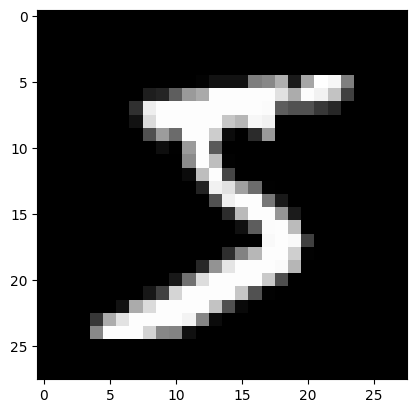

In [ ]:
print(y_train[0])
plt.imshow(list(chunks(x_train[0], sz)), cmap="gray")
plt.show()

In [ ]:
import itertools

In [ ]:
print(dir(itertools))

['__doc__', '__loader__', '__name__', '__package__', '__spec__', '_grouper', '_tee', '_tee_dataobject', 'accumulate', 'chain', 'combinations', 'combinations_with_replacement', 'compress', 'count', 'cycle', 'dropwhile', 'filterfalse', 'groupby', 'islice', 'pairwise', 'permutations', 'product', 'repeat', 'starmap', 'takewhile', 'tee', 'zip_longest']


In [ ]:
itertools.islice?

Init signature: itertools.islice(self, /, *args, **kwargs)
Docstring:     
islice(iterable, stop) --> islice object
islice(iterable, start, stop[, step]) --> islice object

Return an iterator whose next() method returns selected values from an
iterable.  If start is specified, will skip all preceding elements;
otherwise, start defaults to zero.  Step defaults to one.  If
specified as another value, step determines how many values are
skipped between successive calls.  Works like a slice() on a list
but returns an iterator.
Type:           type
Subclasses:     

In [ ]:
from itertools import islice

In [ ]:
for i in islice([1, 2, 3, 4, 5], 2):
    print(i)

1
2


In [ ]:
it = iter([1,2,3,4,5])
print(list(islice(it, 2)))
print(list(islice(it, 2)))
print(list(islice(it, 2)))
print(list(islice(it, 2)))

[1, 2]
[3, 4]
[5]
[]


In [ ]:
iter?

Docstring:
iter(iterable) -> iterator
iter(callable, sentinel) -> iterator

Get an iterator from an object.  In the first form, the argument must
supply its own iterator, or be a sequence.
In the second form, the callable is called until it returns the sentinel.
Type:      builtin_function_or_method

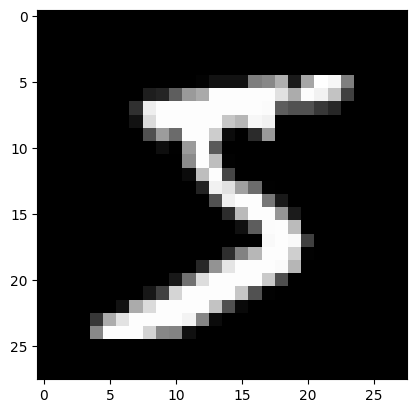

In [ ]:
def squarify(x, size):
    it = iter(x)
    return list(iter(lambda: list(islice(it, size)), list()))

example = squarify(x_train[0], sz)
plt.imshow(example, cmap="gray")
plt.show()

## Matrix and tensor

In [ ]:
example[0][0]

0.0

In [ ]:
class Matrix:
    def __init__(self, data):
        self.data = data

    def __getitem__(self, idxs):
        return self.data[idxs[0]][idxs[1]]

In [ ]:
m = Matrix(example)

In [ ]:
m[0, 0]

0.0

In [ ]:
import torch

In [ ]:
x_train, y_train, x_val, y_val = map(torch.tensor, (x_train, y_train, mnist[1][0], mnist[1][1]))
x_train.shape, y_train.shape, x_val.shape, y_val.shape

(torch.Size([50000, 784]),
 torch.Size([50000]),
 torch.Size([10000, 784]),
 torch.Size([10000]))

In [ ]:
imgs = x_train.reshape(-1, sz, sz)

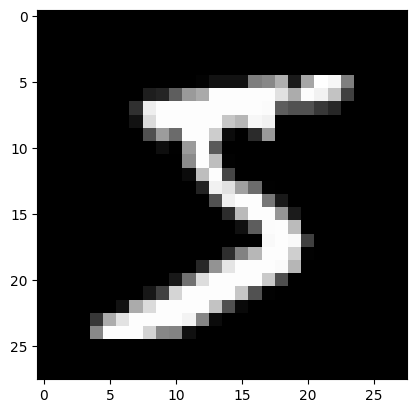

In [ ]:
plt.imshow(imgs[0], cmap="gray"); plt.show()

## Random numbers

In [ ]:
# from https://en.wikipedia.org/wiki/Wichmann%E2%80%93Hill

random_state = [21431, 7631, 634]
def seed(r):
    global random_state
    s1 = r % 30269
    s2 = r % 30307
    s3 = r % 30323
    random_state = [s1, s2, s3]

def rand():
    global random_state
    s1 = (random_state[0] * 171) % 30269
    s2 = (random_state[1] * 172) % 30307
    s3 = (random_state[2] * 170) % 30323
    random_state = [s1, s2, s3]

    return (s1/30269.0 + s2/30307.0 + s3/30323.0) % 1.0

In [ ]:
from time import perf_counter

In [ ]:
# seed(int(perf_counter()))
seed(8765432134565)

In [ ]:
for i in range(5): print(rand())

0.7777685224328588
0.5608034337793862
0.15722909467262935
0.5826127628075546
0.030738730537231085


In [ ]:
import os

In [ ]:
os.fork?

Signature: os.fork()
Docstring:
Fork a child process.

Return 0 to child process and PID of child to parent process.
Type:      builtin_function_or_method

In [ ]:
from time import sleep

In [ ]:
if os.fork():
    sleep(0.5)
    print("Main", rand())
else:
    print("Child", rand())
    os._exit(os.EX_OK)

Child 0.5747166945894608
Main 0.5747166945894608


In [ ]:
if os.fork():
    sleep(0.5)
    print("Main", torch.rand(1))
else:
    print("Child", torch.rand(1))
    os._exit(os.EX_OK)

Child tensor([0.5891])
Main tensor([0.5891])


In [ ]:
values = [rand() for i in range(200)]

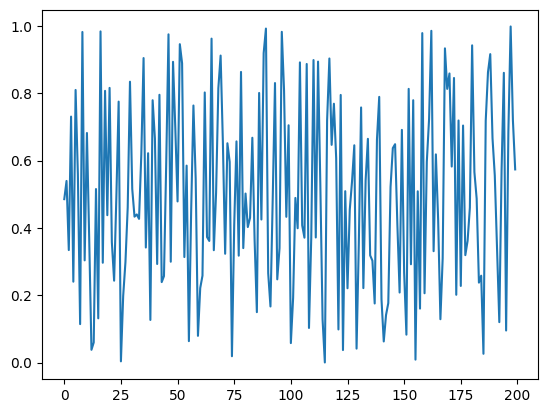

In [ ]:
plt.plot(range(200), values)
plt.show()

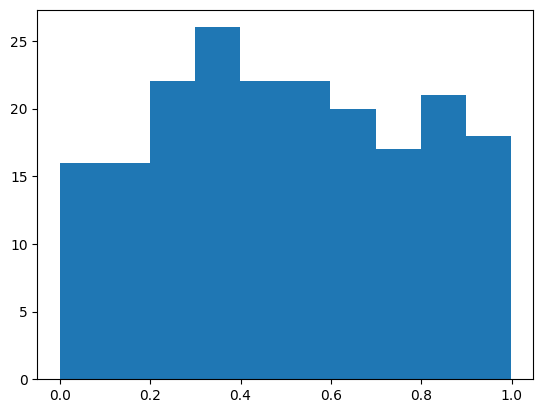

In [ ]:
plt.hist(values); plt.show()

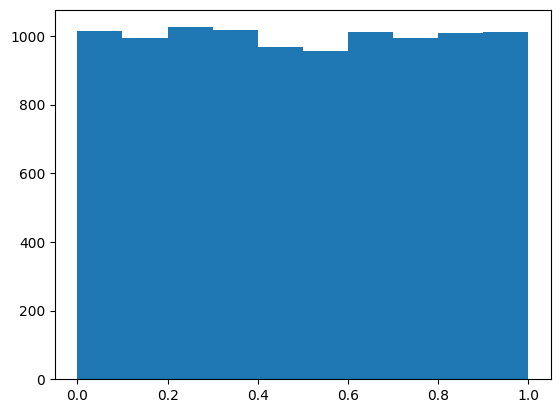

In [ ]:
plt.hist([rand() for i in range(10000)]); plt.show()

In [ ]:
%timeit?

Docstring:
Time execution of a Python statement or expression

Usage, in line mode:
  %timeit [-n<N> -r<R> [-t|-c] -q -p<P> -o] statement
or in cell mode:
  %%timeit [-n<N> -r<R> [-t|-c] -q -p<P> -o] setup_code
  code
  code...

Time execution of a Python statement or expression using the timeit
module.  This function can be used both as a line and cell magic:

- In line mode you can time a single-line statement (though multiple
  ones can be chained with using semicolons).

- In cell mode, the statement in the first line is used as setup code
  (executed but not timed) and the body of the cell is timed.  The cell
  body has access to any variables created in the setup code.

Options:
-n<N>: execute the given statement <N> times in a loop. If <N> is not
provided, <N> is determined so as to get sufficient accuracy.

-r<R>: number of repeats <R>, each consisting of <N> loops, and take the
average result.
Default: 7

-t: use time.time to measure the time, which is the default on Unix.
Thi

In [ ]:
%timeit -n 5 [[rand() for _ in range(784)] for _ in range(10)]
%timeit -n 5 torch.rand((784, 10))

2.75 ms ± 50.1 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)
46.5 µs ± 20.3 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


## Matrix multiplication

In [ ]:
torch.manual_seed(1103)

<torch._C.Generator>

In [ ]:
w = torch.randn((784, 10))
b = torch.zeros(10)
w.shape, b.shape

(torch.Size([784, 10]), torch.Size([10]))

In [ ]:
m = x_train[:5]
m.shape

torch.Size([5, 784])

In [ ]:
result = torch.zeros(m.shape[0], w.shape[1])
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        for k in range(m.shape[1]):
            result[i][j] += m[i, k] * w[k, j]

In [ ]:
result

tensor([[ -0.7215,  -4.5665, -21.0250,  -0.4281,   1.4521,  -8.2872,  -1.0804,
           0.1370, -25.5540,  -3.2380],
        [  4.2790,  -6.4928,  -7.4115,   3.6243,   0.5892,  -4.4752,   2.3418,
          -4.8072, -17.5455,   2.5698],
        [  3.0545,   3.2306,  -1.2660,  -3.0757,  10.4760,   2.1747,   1.9288,
          -5.3326,  -1.1477,   1.0585],
        [ -0.4721,   3.0316,  12.0594,   2.9842,  -5.3094,  -1.5481, -10.7299,
           5.4374,  -5.7825,  -5.9126],
        [ -3.6298,   0.4382,  10.2078, -11.9693,  -0.7163,   4.1653,  -7.3586,
          -7.6137,  -8.4538, -12.5987]])

In [ ]:
torch.set_printoptions(precision=2, linewidth=160)

In [ ]:
result

tensor([[ -0.72,  -4.57, -21.03,  -0.43,   1.45,  -8.29,  -1.08,   0.14, -25.55,  -3.24],
        [  4.28,  -6.49,  -7.41,   3.62,   0.59,  -4.48,   2.34,  -4.81, -17.55,   2.57],
        [  3.05,   3.23,  -1.27,  -3.08,  10.48,   2.17,   1.93,  -5.33,  -1.15,   1.06],
        [ -0.47,   3.03,  12.06,   2.98,  -5.31,  -1.55, -10.73,   5.44,  -5.78,  -5.91],
        [ -3.63,   0.44,  10.21, -11.97,  -0.72,   4.17,  -7.36,  -7.61,  -8.45, -12.60]])

In [ ]:
import numpy as np

In [ ]:
np.set_printoptions(precision=2, linewidth=160)

In [ ]:
def matmul(a, b):
    result = torch.zeros(a.shape[0], b.shape[1])
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            for k in range(a.shape[1]):
                result[i][j] += a[i, k] * b[k, j]
    return result

In [ ]:
%time?

Docstring:
Time execution of a Python statement or expression.

The CPU and wall clock times are printed, and the value of the
expression (if any) is returned.  Note that under Win32, system time
is always reported as 0, since it can not be measured.

This function can be used both as a line and cell magic:

- In line mode you can time a single-line statement (though multiple
  ones can be chained with using semicolons).

- In cell mode, you can time the cell body (a directly
  following statement raises an error).

This function provides very basic timing functionality.  Use the timeit
magic for more control over the measurement.

.. versionchanged:: 7.3
    User variables are no longer expanded,
    the magic line is always left unmodified.

Examples
--------
::

  In [1]: %time 2**128
  CPU times: user 0.00 s, sys: 0.00 s, total: 0.00 s
  Wall time: 0.00
  Out[1]: 340282366920938463463374607431768211456L

  In [2]: n = 1000000

  In [3]: %time sum(range(n))
  CPU times: user 1.20 s,

In [ ]:
%time _ = matmul(m, w)

CPU times: user 591 ms, sys: 3.33 ms, total: 595 ms
Wall time: 595 ms


In [ ]:
np.prod(m.shape) * w.shape[1]

39200

## Numba

In [ ]:
from numba import njit

In [ ]:
@njit
def dot(a, b):
    result = 0
    for i in range(len(a)):
        result += a[i] * b[i]
    return result

In [ ]:
%time _ = dot(np.array([1,2,3,4,5]),np.array([6,7,8,9,-1]))
%time _ = dot(np.array([1,2,3,4,5]),np.array([6,7,8,9,-1]))
%time _ = dot(np.array([1,2,3,4,5]),np.array([6,7,8,9,-1]))
%time _ = dot(np.array([1,2,3,4,5]),np.array([6,7,8,9,-1]))

CPU times: user 225 ms, sys: 22.4 ms, total: 248 ms
Wall time: 247 ms
CPU times: user 11 µs, sys: 5 µs, total: 16 µs
Wall time: 18.8 µs
CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 12.2 µs
CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 11.2 µs


In [ ]:
def matmul(a, b):
    result = torch.zeros(a.shape[0], b.shape[1])
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            result[i][j] = dot(a[i, :], b[:, j])
    return result

In [ ]:
from fastcore.test import *

In [ ]:
mn = m.numpy()
wn = w.numpy()

In [ ]:
test_close(result, matmul(mn, wn))

In [ ]:
%timeit -n 50 _=matmul(mn, wn)

424 µs ± 24.2 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [ ]:
614 / 0.424

1448.1132075471698

## Elementwise ops

In [ ]:
a = torch.randn(3, 4)
a

tensor([[-1.27,  0.62, -0.91, -0.36],
        [-1.06, -1.18, -0.23,  0.90],
        [-0.06, -0.72, -0.54,  0.07]])

In [ ]:
a.mean()

tensor(-0.40)

In [ ]:
b = torch.randn(3, 4)

In [ ]:
a+b

tensor([[-0.39,  1.05, -1.66, -0.26],
        [ 0.59, -1.13, -0.27,  2.52],
        [ 1.06,  0.45,  0.33,  0.04]])

In [ ]:
try:
    (a<b).mean()
except Exception as e:
    print(e)

mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Bool


In [ ]:
(a < b).float().mean()

tensor(0.83)

In [ ]:
(a*a).sum().sqrt()

tensor(2.67)

In [ ]:
m[2, :].shape, w[:, 2].shape

(torch.Size([784]), torch.Size([784]))

In [ ]:
def matmul(a, b):
    result = torch.zeros(a.shape[0], b.shape[1])
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            result[i][j] = (a[i, :] * b[:, j]).sum()
    return result

In [ ]:
test_close(result, matmul(m, w))

In [ ]:
%timeit -n 50 _=matmul(m, w)

1.06 ms ± 12.9 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


## Broadcasting

### Broadcasting with a scalar

In [ ]:
a + 1

tensor([[-0.27,  1.62,  0.09,  0.64],
        [-0.06, -0.18,  0.77,  1.90],
        [ 0.94,  0.28,  0.46,  1.07]])

In [ ]:
a < 0

tensor([[ True, False,  True,  True],
        [ True,  True,  True, False],
        [ True,  True,  True, False]])

In [ ]:
a * 0

tensor([[-0., 0., -0., -0.],
        [-0., -0., -0., 0.],
        [-0., -0., -0., 0.]])

### Broadcasting a vector to a matrix

In [ ]:
a = torch.tensor([[1,2,3],[2,3,4],[3,4,5]])
b = torch.tensor([1,-1,2])
a.shape, b.shape

(torch.Size([3, 3]), torch.Size([3]))

In [ ]:
a+b

tensor([[2, 1, 5],
        [3, 2, 6],
        [4, 3, 7]])

In [ ]:
b+a

tensor([[2, 1, 5],
        [3, 2, 6],
        [4, 3, 7]])

In [ ]:
c = b.expand_as(a)
c

tensor([[ 1, -1,  2],
        [ 1, -1,  2],
        [ 1, -1,  2]])

In [ ]:
c.storage()

/tmp/ipykernel_2703/1226304414.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  c.storage()


 1
 -1
 2
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 3]

In [ ]:
c.untyped_storage()

 1
 0
 0
 0
 0
 0
 0
 0
 255
 255
 255
 255
 255
 255
 255
 255
 2
 0
 0
 0
 0
 0
 0
 0
[torch.storage.UntypedStorage(device=cpu) of size 24]

In [ ]:
b.storage()

 1
 -1
 2
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 3]

In [ ]:
b.stride()

(1,)

In [ ]:
c.stride()

(0, 1)

In [ ]:
b[None, :]

tensor([[ 1, -1,  2]])

In [ ]:
a[..., None, :]

tensor([[[1, 2, 3]],

        [[2, 3, 4]],

        [[3, 4, 5]]])

In [ ]:
a[..., None]

tensor([[[1],
         [2],
         [3]],

        [[2],
         [3],
         [4]],

        [[3],
         [4],
         [5]]])

In [ ]:
a.unsqueeze(-1)

tensor([[[1],
         [2],
         [3]],

        [[2],
         [3],
         [4]],

        [[3],
         [4],
         [5]]])

In [ ]:
a+b

tensor([[2, 1, 5],
        [3, 2, 6],
        [4, 3, 7]])

In [ ]:
a+b[:, None]

tensor([[2, 3, 4],
        [1, 2, 3],
        [5, 6, 7]])

In [ ]:
a+b[None, :]

tensor([[2, 1, 5],
        [3, 2, 6],
        [4, 3, 7]])

### Broadcasting rules

I think the rules go something like this:

- can ignore the trailing dimensions in the beginning by expanding the other tensor
- the rest should be either equal or one of them should be `1`

In [ ]:
def check(s1, s2):
    a = torch.empty(s1)
    b = torch.empty(s2)
    try:
        print((a+b).shape)
    except Exception as e:
        print("not allowed")

In [ ]:
check((1,2,3),(2,3))

torch.Size([1, 2, 3])


In [ ]:
check((2,3),(1,2,3))

torch.Size([1, 2, 3])


In [ ]:
check((1,2,3),(1,3))

torch.Size([1, 2, 3])


In [ ]:
check((1,3),(2,1,3))

torch.Size([2, 1, 3])


In [ ]:
check((2,3),(1,2,3))

torch.Size([1, 2, 3])


In [ ]:
check((1,2,3,1),(2,3))

not allowed


In [ ]:
check((2,3,1),(2,3))

not allowed


In [ ]:
check((5,4,3,2,1),(2,))

torch.Size([5, 4, 3, 2, 2])


In [ ]:
check((5,4,3,2,2),(2,))

torch.Size([5, 4, 3, 2, 2])


In [ ]:
check((5,4,3,2,3),(2,))

not allowed


In [ ]:
check((5,4,3,2,1),(2,2))

torch.Size([5, 4, 3, 2, 2])


In [ ]:
check((5,4,3,2,1),(2,3))

torch.Size([5, 4, 3, 2, 3])


In [ ]:
check((5,4,3,2,1),(3,2,))

not allowed


## Matmul with broadcasting

In [ ]:
m.shape,w.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [ ]:
try:
    m[..., None].expand_as(w).shape
except Exception as e:
    print(e)

expand(torch.FloatTensor{[5, 784, 1]}, size=[784, 10]): the number of sizes provided (2) must be greater or equal to the number of dimensions in the tensor (3)


In [ ]:
m[0, ..., None].expand_as(w).shape

torch.Size([784, 10])

In [ ]:
(m[0, ..., None] * w).sum(dim=1).shape

torch.Size([784])

In [ ]:
def matmul(a, b):
    result = torch.zeros(a.shape[0], b.shape[1])
    for i in range(result.shape[0]):
        result[i] = (a[i, ..., None] * b).sum(dim=0)
    return result

In [ ]:
test_close(result, matmul(m, w))

In [ ]:
%timeit -n 50 _=matmul(m, w)

142 µs ± 49.3 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [ ]:
%time _=matmul(x_train,w)

CPU times: user 1.01 s, sys: 3.82 ms, total: 1.01 s
Wall time: 1 s


In [ ]:
matmul(x_train,w).shape

torch.Size([50000, 10])

## Einstein summation

- If the column name is the same, then multiply across that dimension
- If the column is removed, sum across that dimension

In [ ]:
a = torch.ones((2, 3)) * -2
b = torch.ones((3, 2)) * 3

In [ ]:
torch.einsum("ij,jk->ik", a, b)

tensor([[-18., -18.],
        [-18., -18.]])

In [ ]:
a@b

tensor([[-18., -18.],
        [-18., -18.]])

In [ ]:
torch.einsum("ij->i", a)

tensor([-6., -6.])

In [ ]:
torch.einsum("ij,jk->ijk", a, b)

tensor([[[-6., -6.],
         [-6., -6.],
         [-6., -6.]],

        [[-6., -6.],
         [-6., -6.],
         [-6., -6.]]])

In [ ]:
def matmul(a, b):
    return torch.einsum("ij,jk->ik", a, b)

In [ ]:
test_close(result, matmul(m, w))

In [ ]:
%timeit -n 5 _=matmul(x_train, w)

8.72 ms ± 466 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


## PyTorch op

In [ ]:
test_close(result, m@w)

In [ ]:
%timeit -n 5 _=x_train@w

7.42 ms ± 369 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


## CUDA

In [ ]:
def matmul(grid, a, b, c):
    x, y = grid[0], grid[1]
    if y < c.shape[0] and x < c.shape[1]:
        tmp = 0
        for k in range(a.shape[1]):
            tmp += a[y, k] * b[k, x]
        c[y, x] = tmp

In [ ]:
res = torch.zeros(m.shape[0], w.shape[1])
matmul((0, 0), m, w, res)
res

tensor([[-0.72,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00],
        [ 0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00],
        [ 0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00],
        [ 0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00],
        [ 0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00]])

In [ ]:
def launch_kernel(kernel, grid_x, grid_y, *args, **kwargs):
    for x in range(grid_x):
        for y in range(grid_y):
            kernel((x, y), *args, **kwargs)

In [ ]:
res = torch.zeros(m.shape[0], w.shape[1])
launch_kernel(matmul, res.shape[1], res.shape[0], m, w, res)
res

tensor([[ -0.72,  -4.57, -21.03,  -0.43,   1.45,  -8.29,  -1.08,   0.14, -25.55,  -3.24],
        [  4.28,  -6.49,  -7.41,   3.62,   0.59,  -4.48,   2.34,  -4.81, -17.55,   2.57],
        [  3.05,   3.23,  -1.27,  -3.08,  10.48,   2.17,   1.93,  -5.33,  -1.15,   1.06],
        [ -0.47,   3.03,  12.06,   2.98,  -5.31,  -1.55, -10.73,   5.44,  -5.78,  -5.91],
        [ -3.63,   0.44,  10.21, -11.97,  -0.72,   4.17,  -7.36,  -7.61,  -8.45, -12.60]])

In [ ]:
test_close(result, res)

In [ ]:
from numba import cuda

In [ ]:
@cuda.jit
def matmul(a, b, c):
    y, x = cuda.grid(2)
    if y < c.shape[0] and x < c.shape[1]:
        tmp = 0.0
        for k in range(a.shape[1]):
            tmp += a[y, k] * b[k, x]
        c[y, x] = tmp

In [ ]:
res_cuda = np.zeros((x_train.shape[0], w.shape[1]))
x_train_g, w_g, res_cuda_g = map(cuda.to_device, (x_train, w, res_cuda))

In [ ]:
import math

In [ ]:
TPB = 16
blockspergrid = math.ceil(res_cuda.shape[0] / TPB), math.ceil(res_cuda.shape[1] / TPB)
blockspergrid

(3125, 1)

In [ ]:
matmul[blockspergrid, (TPB, TPB)](x_train_g, w_g, res_cuda_g)

In [ ]:
res_cuda = res_cuda_g.copy_to_host()

In [ ]:
test_close(x_train@w, res_cuda, eps=1e-4)

In [ ]:
%%timeit -n 5
res_cuda = np.zeros((x_train.shape[0], w.shape[1]))
x_train_g, w_g, res_cuda_g = map(cuda.to_device, (x_train, w, res_cuda))
matmul[blockspergrid, (TPB, TPB)](x_train_g, w_g, res_cuda_g)
res_cuda = res_cuda_g.copy_to_host()

55.2 ms ± 474 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [ ]:
%%timeit -n 5
matmul[blockspergrid, (TPB, TPB)](x_train_g, w_g, res_cuda_g)
res_cuda = res_cuda_g.copy_to_host()

18.7 ms ± 63.9 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [ ]:
%%timeit -n 5
matmul[blockspergrid, (TPB, TPB)](x_train_g, w_g, res_cuda_g)

The slowest run took 7.46 times longer than the fastest. This could mean that an intermediate result is being cached.
104 µs ± 95.2 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [ ]:
x_train_c, w_c = x_train.cuda(), w.cuda()

In [ ]:
r_c = x_train_c@w_c
r_c = r_c.cpu()

In [ ]:
test_close(res_cuda, r_c.numpy())

In [ ]:
%%timeit -n 5
x_train_c, w_c = x_train.cuda(), w.cuda()
r_c = x_train_c@w_c
r_c = r_c.cpu()

27.4 ms ± 1.35 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [ ]:
%%timeit -n 5
r_c = x_train_c@w_c
r_c = r_c.cpu()

2.82 ms ± 288 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [ ]:
%%timeit -n 5
r_c = x_train_c@w_c

The slowest run took 38.94 times longer than the fastest. This could mean that an intermediate result is being cached.
42.3 µs ± 85.1 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)
